# 4. Domácí úkol: Astronomická data

V tomto úkolu budeme pracovat s astronomickou [databází HYG (Hypparcos, Yale, Glies)](https://www.astronexus.com/hyg) sdružující vybrané informace z vybraných zdrojů o vybraných hvězdách.

Komprimovaný CSV soubor s daty můžete stáhnout [zde](https://www.astronexus.com/downloads/catalogs/athyg_v24.csv.gz).

Jednotlivé úkoly, které je potřeba v rámci tohoto domácího úkolu splnit, jsou popsány níže.
K řešení můžete využít více buněk, je vhodné své řešení textově stručně okomentovat.

## 4.0 Knihovny

In [18]:
using DataFrames
using CSV
using Statistics
using Plots
using Printf
using Images

[ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
┌ Warning: Module StatsBase with build ID fafbfcfd-094a-5759-0000-01f49aeea6c4 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing Images [916415d5-f1e6-5110-898d-aaa5f9f070e0].
[ Info: Precompiling ImageCorners [89d5987c-236e-4e32-acd0-25bd6bd87b70]
┌ Warning: Module StatsBase with build ID fafbfcfd-094a-5759-0000-01f49aeea6c4 is missing from the cache.
│ This may mean StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing ImageCorners [89d5987c-236e-4e32-acd0-25bd6bd87b70].
[ Info: Precompiling ImageSegmentation [80713f31-8817-5129-9cf8-209ff8fb23e1]
┌ Warn

## 4.1 Načtení dat

**a.** Stáhněte si [soubor s databází](https://www.astronexus.com/downloads/catalogs/athyg_v24.csv.gz) zmíněný výše a rozbalte ho do adresáře `data`, který je přidán do `.gitignore`, abychom **nepushovali stovky megabyte do repozitáře**!

**b.** Načtěte obsah souboru do DataFrame z balíčku DataFrames.

Pomocí balíčku `CSV` načteme data do dataframu. První argument je cesta k souboru, druhý je výstupní formát dat, tedy `DataFrame`.

In [19]:
data = CSV.read(joinpath("data", "athyg_v24.csv"), DataFrame)
first(data, 10) #show only first 10 rows

Row,id,tyc,gaia,hyg,hip,hd,hr,gl,bayer,flam,con,proper,ra,dec,pos_src,dist,x0,y0,z0,dist_src,mag,absmag,ci,mag_src,rv,rv_src,pm_ra,pm_dec,pm_src,vx,vy,vz,spect,spect_src
,Int64,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,String15?,String7?,Int64?,String3?,String31?,Float64,Float64,String7,Float64?,Float64?,Float64?,Float64?,String7,Float64,Float64?,Float64?,String7,Float64?,String7,Float64?,Float64?,String7,Float64?,Float64?,Float64?,String31?,String7?
1,1,missing,missing,0,missing,missing,missing,missing,missing,missing,missing,Sol,0.0,0.0,OTHER,0.0,5.0e-6,0.0,0.0,OTHER,-26.7,4.85,0.656,OTHER,missing,OTHER,missing,missing,OTHER,missing,missing,missing,G2 V,OTHER
2,2,4669-731-1,2443095153084654208,missing,missing,224701,missing,missing,missing,missing,Psc,missing,2.263e-5,-5.49436,T,509.196,506.856,0.003,-48.754,G_R3,9.239,0.705,1.117,T,-17.371,G_R3,22.498,-11.301,G_R3,-19.904,54.306,-25.49,G8 IV,T
3,3,1-381-1,missing,1,1,224700,missing,missing,missing,missing,Psc,missing,5.974e-5,1.08901,T,219.78,219.741,0.003,4.177,HIP,9.1,2.39,0.482,HIP,missing,N,-5.2,-1.88,HYG,0.037,-5.418,-1.958,F3 V,T
4,4,3258-1994-1,395709634934560256,missing,missing,missing,missing,missing,missing,missing,Cas,missing,6.663e-5,52.1778,T,696.999,427.409,0.007,550.572,G_R3,11.816,2.6,1.228,T,-27.782,G_R3,14.421,1.836,G_R3,-21.83,47.647,-18.225,missing,N
5,5,5260-880-1,2422928220045464320,missing,missing,missing,missing,missing,missing,missing,Cet,missing,7.408e-5,-9.85649,T,501.797,494.39,0.01,-85.898,G_R3,12.213,3.71,1.224,T,-44.539,G_R3,-10.292,-17.136,G_R3,-50.859,-24.482,-32.536,missing,N
6,6,6992-893-1,2312711078532837632,missing,missing,missing,missing,missing,missing,missing,Scl,missing,7.429e-5,-34.6979,T,454.809,373.928,0.007,-258.899,G_R3,11.447,3.158,1.377,T,23.626,G_R3,18.349,-15.049,G_R3,0.954,39.56,-40.125,missing,N
7,7,3254-1981-1,393457319723284096,missing,missing,missing,missing,missing,missing,missing,Cas,missing,0.00011352,49.0362,T,283.337,185.751,0.006,213.955,G_R3,11.292,4.03,0.466,T,-19.377,G_R3,-7.216,-4.227,G_R3,-8.415,-9.693,-18.354,missing,N
8,8,8028-139-1,4976477592542752384,missing,missing,missing,missing,missing,missing,missing,Phe,missing,0.00011631,-51.244,T,265.625,166.283,0.005,-207.139,G_R3,12.067,4.946,0.723,T,30.575,G_R3,-13.233,-17.704,G_R3,1.756,-16.663,-37.799,missing,N
9,9,1729-242-1,2848069474850082944,missing,missing,missing,missing,missing,missing,missing,Peg,missing,0.00014976,22.6966,T,399.693,368.741,0.014,154.223,G_R3,11.948,3.939,0.287,T,3.238,G_R3,16.516,10.689,G_R3,-4.828,31.292,19.933,missing,N


**c.** Kolik záznamů (hvězd) je v databázi?

Počet záznamů odpovídá počtu řádek v datasetu, tedy můžeme použít funkci `nrow()`, která vrátí počet řádek v datasetu.

In [20]:
nrow(data)

2552165

## 4.2 Zajímavé hvězdy

**a.** Která hvězda je nejbližší (vzdálenost je uložena ve sloupci `dist` v jednotkách [parsec](https://en.wikipedia.org/wiki/Parsec)). Vyhledejte pět nejbližších hvězd a uveďte jejich vzdálenost od Slunce ve [světelných letech](https://en.wikipedia.org/wiki/Light-year). Vypište i jejich jméno (sloupec `proper` v případě pojmenovaných hvězd) a vypište v jakém se nachází souhvězdí (sloupec `con`).

Nejbližší hvězda je Slunce, což je docela zřejmé, protože sloupec `dist` udává vzdálenost od Slunce. Pomocí `argmin` jsem našel index hvězdy s nejmenší hodnotou ve sloupci `dist`. Také jsem použil funkci `skipmissing`, aby byla zajištěna korektnost vyhledávání.

In [21]:
min_dist_idx = argmin(skipmissing(data.dist))
println("Nejbližší hvězda je " * string(data[min_dist_idx, "proper"]) * " a je vzdálena " * string(data[min_dist_idx, "dist"]) * " parseků")

Nejbližší hvězda je Sol a je vzdálena 0.0 parseků


Do nové proměnné zapišeme všechny záznamy, které mají hodnotu `dist` **NE** `missing`. Poté seřadíme data podle sloupce `dist` (funkce `sort` defaultně řadí vzestupně.) a pomocí funkce `first` omezíme to na 5 řádků. Pomocí funkce `select` omezíme dataset pouze na sloupce `proper`, `dist` a `con`. Dále vytvoříme nový sloupec `dist_light_year`, do kterého zapišeme vzdálenost od Slunce ve světelných letech, tedy vynásobíme parseky hodnotou 3.26.

In [22]:
dist_no_missing = data[data.dist .!== missing, :]

first_five_stars = first(sort(dist_no_missing, :dist), 5)
stars_first = select(first_five_stars, [:proper], [:dist], [:con])
stars_first.dist_light_year = 3.26 .* stars_first.dist
display(stars_first)

Row,proper,dist,con,dist_light_year
,String31?,Float64?,String3?,Float64
1,Sol,0.0,missing,0.0
2,Proxima Centauri,1.302,Cen,4.24452
3,Toliman,1.3248,Cen,4.31885
4,Rigil Kentaurus,1.3248,Cen,4.31885
5,Barnard's Star,1.8282,Oph,5.95993


**b.** Vypište vzdálenosti pěti nejvzdálenějších hvězd. Uveďte jejich vzdálenosti od slunce ve světelných letech a v jakých souhvězdích se nachází.

Provedeme stejné kroky jako v bodě a, ale tentokrát přidáme do funkce `sort` parametr `rev = true`, aby seřadil sestupně.

In [23]:
last_five_stars = first(sort(dist_no_missing, :dist, rev = true), 5)
stars_last = select(last_five_stars, [:proper], [:dist], [:con])
stars_last.dist_light_year = 3.26 .* stars_last.dist
display(stars_last)

Row,proper,dist,con,dist_light_year
,String31?,Float64?,String3?,Float64
1,missing,1.36986e5,Dor,4.46575e5
2,missing,1.05263e5,Aur,3.43158e5
3,missing,87477.3,Dor,2.85176e5
4,missing,83319.4,Dor,2.71621e5
5,missing,82426.2,Dor,2.68709e5


**c.** Nalezněte pět nejjasnějších hvězd dle jasnosti vnímané pozorovatelem na Zemi (tj. hvězdy s největší magnitudou, sloupec `mag`). Vypište opět jejich jména a souhvězdí, do kterých patří.

Provedeme stejné kroky jako v bodech a a b, ale pro sloupec `mag`.

In [24]:
mag_no_missing = data[data.mag .!== missing, :]

mag_five_stars = first(sort(mag_no_missing, :mag), 5)
stars_mag = select(mag_five_stars, [:proper], [:mag], [:con])
display(stars_mag)

Row,proper,mag,con
,String31?,Float64,String3?
1,Sol,-26.7,missing
2,Sirius,-1.44,CMa
3,Canopus,-0.62,Car
4,Arcturus,-0.05,Boo
5,Rigil Kentaurus,-0.01,Cen


## 4.3 Nejjasnější souhvězdí

**a.** Kolik souhvězdí (sloupec `con`) je v databázi celkem uvedeno?

Chybějící hodnota je ve sloupci `con` pouze jedna a to je pro Slunce, takže můžeme chybějící hodnoty ve sloupci `con` dále neuvažovat.

In [25]:
filter(row -> ismissing(row[:con]), eachrow(data))

Row,id,tyc,gaia,hyg,hip,hd,hr,gl,bayer,flam,con,proper,ra,dec,pos_src,dist,x0,y0,z0,dist_src,mag,absmag,ci,mag_src,rv,rv_src,pm_ra,pm_dec,pm_src,vx,vy,vz,spect,spect_src
,Int64,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,String15?,String7?,Int64?,String3?,String31?,Float64,Float64,String7,Float64?,Float64?,Float64?,Float64?,String7,Float64,Float64?,Float64?,String7,Float64?,String7,Float64?,Float64?,String7,Float64?,Float64?,Float64?,String31?,String7?
1,1,missing,missing,0,missing,missing,missing,missing,missing,missing,missing,Sol,0.0,0.0,OTHER,0.0,5.0e-6,0.0,0.0,OTHER,-26.7,4.85,0.656,OTHER,missing,OTHER,missing,missing,OTHER,missing,missing,missing,G2 V,OTHER


Do nové proměnné zapišeme všechny záznamy, které mají hodnotu `con` **NE** `missing`. Pomocí funkcí `unique` a `skipmissing` najdeme unikátní hodnoty ve sloupci `con`, které nejsou chybějící (`missing`). Funkce `unique` nám vrátí vektor hodnot. Délku tohoto vektoru najdeme pomocí funkce `length`, což bude počet souhvězdí.

In [26]:
con_no_missing  = data[data.con .!== missing, :]
con_count = length(unique(skipmissing(con_no_missing.con)))
println("Počet souhvězdí: " * string(con_count))

Počet souhvězdí: 90


**b.** Nalezněte pět souhvězdí, která jsou nejjasnější (při pohledu ze Slunce) podle následujícího kritéria: pro každé souhvězdí spočteme "naší jasnost", která je dána _mediánem_ jasností _deseti_ nejjasnějších hvězd daného souhvězdí (magnituda, `mag`).

Vytvořil jsem pomocnou funkci `median_top_ten`, která setřídí sloupec `mag` vzetupně a pro prvních 10 hodnot (nebo pro menší počet, pokud je maximální počet záznamů ve skupině menší) vrátí medián.

In [27]:
function median_top_ten(df)
    top_ten = sort(df.mag)[1:min(10, nrow(df))]
    return median(top_ten)
end

median_top_ten (generic function with 1 method)

Nejprve zvolíme pouze záznamy, které nemají ve sloupcích `mag` a `con` chybějící hodnoty. Seskupíme data podle hodnot sloupce `con` (tedy podle souhvězdí) a vytvoříme pomocný dataset `tmp`. Pro každou skupinu spočítáme medián a vložíme do datasetu `tmp` záznam ve formátu (`con`, `median_top_ten`).

In [28]:
mag_con_no_missing = mag_no_missing[mag_no_missing.con .!== missing, :]
grouped_data = groupby(mag_con_no_missing, :con)
tmp = DataFrame()
for i in range(1, con_count)
    new_row = (con=grouped_data[i].con[1], median_top_ten=median_top_ten(grouped_data[i])) 
    push!(tmp, new_row)
end

Setřídíme získaný dataset sestupně a omezíme ho pouze na prvních 5 hodnot.

In [29]:
first(sort(tmp, :median_top_ten), 5)

Row,con,median_top_ten
,String3,Float64
1,Ori,1.905
2,Cen,2.245
3,Sco,2.34
4,UMa,2.375
5,CMa,2.735


## 4.4 Hertzsprungův–Russelllův diagram

**a.** K hvězdám, které mají uvedenou spektrální klasifikaci (sloupec `spect`, hodnota není `missing`) přídejte do nového sloupce `temp` jejich přibližnou povrchovou teplotu napočtenou podle Ballesterosova vzorce

$$ T(\mathrm{ci}) = 4600 \, K \left( \frac{1}{0.92\mathrm{ci} + 1.7} + \frac{1}{0.92\mathrm{ci} + 0.62} \right), $$

kde $\mathrm{ci}$ je [barevný index hvězdy](https://en.wikipedia.org/wiki/Color_index) uvedený ve sloupci `ci`.

Pro Ballesterosův vzorec jsem vytvořil samostatnou funkci `T`. 

In [30]:
function T(ci)
    return 4600 * ( (1/(0.92*ci + 1.7)) + (1/(0.92*ci + 0.62)) )
end

T (generic function with 1 method)

Vyfiltroval jsem pouze záznamy bez chybějících hodnot ve sloupcích `spect` a `ci` (pro výpočet povrchové teploty potřebujeme data bez chybějících hodnot).

In [31]:
spect_no_missing = data[(data.spect .!== missing), :]
spect_ci_no_missing = spect_no_missing[(spect_no_missing.ci .!== missing), :]
filter(row -> ismissing(row[:ci]), eachrow(spect_ci_no_missing))

Row,id,tyc,gaia,hyg,hip,hd,hr,gl,bayer,flam,con,proper,ra,dec,pos_src,dist,x0,y0,z0,dist_src,mag,absmag,ci,mag_src,rv,rv_src,pm_ra,pm_dec,pm_src,vx,vy,vz,spect,spect_src
,Int64,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,String15?,String7?,Int64?,String3?,String31?,Float64,Float64,String7,Float64?,Float64?,Float64?,Float64?,String7,Float64,Float64?,Float64?,String7,Float64?,String7,Float64?,Float64?,String7,Float64?,Float64?,Float64?,String31?,String7?


Pro výpočet povrchové teploty jsem použil funkci `transform`, která vezme každou hodnotu ze sloupce `ci` v datasetu `spect_ci_no_missing`, aplikuje na ni funkci `T` a výsledek funkce zapíše do nového sloupce `temp`.

In [32]:
transform!(spect_ci_no_missing, :ci => ByRow(T) => :temp)
first(spect_ci_no_missing, 5)

Row,id,tyc,gaia,hyg,hip,hd,hr,gl,bayer,flam,con,proper,ra,dec,pos_src,dist,x0,y0,z0,dist_src,mag,absmag,ci,mag_src,rv,rv_src,pm_ra,pm_dec,pm_src,vx,vy,vz,spect,spect_src,temp
,Int64,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,String15?,String7?,Int64?,String3?,String31?,Float64,Float64,String7,Float64?,Float64?,Float64?,Float64?,String7,Float64,Float64?,Float64?,String7,Float64?,String7,Float64?,Float64?,String7,Float64?,Float64?,Float64?,String31?,String7?,Float64
1,1,missing,missing,0,missing,missing,missing,missing,missing,missing,missing,Sol,0.0,0.0,OTHER,0.0,5.0e-6,0.0,0.0,OTHER,-26.7,4.85,0.656,OTHER,missing,OTHER,missing,missing,OTHER,missing,missing,missing,G2 V,OTHER,5756.59
2,2,4669-731-1,2443095153084654208,missing,missing,224701,missing,missing,missing,missing,Psc,missing,2.263e-5,-5.49436,T,509.196,506.856,0.003,-48.754,G_R3,9.239,0.705,1.117,T,-17.371,G_R3,22.498,-11.301,G_R3,-19.904,54.306,-25.49,G8 IV,T,4478.31
3,3,1-381-1,missing,1,1,224700,missing,missing,missing,missing,Psc,missing,5.974e-5,1.08901,T,219.78,219.741,0.003,4.177,HIP,9.1,2.39,0.482,HIP,missing,N,-5.2,-1.88,HYG,0.037,-5.418,-1.958,F3 V,T,6471.67
4,14,2259-803-1,2873720840608127872,missing,missing,missing,missing,missing,missing,missing,Peg,missing,0.00022447,31.5321,T,817.134,696.482,0.041,427.341,G_R3,9.013,-0.548,1.751,T,38.654,G_R3,9.265,-4.88,G_R3,42.83,35.891,4.105,K2,T,3451.27
5,21,5841-1155-1,2341871673090078592,2,2,224690,missing,missing,missing,missing,Cet,missing,0.00028401,-19.4988,T,37.3164,35.176,0.003,-12.456,G_R3,9.27,6.411,0.999,HIP,6.83,G_R3,179.805,-1.041,G_R3,6.375,31.807,-2.454,K3 V,T,4745.14


**a.** Pokuste se nakreslit [Hertzprungův-Russelův diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) pro hvězdy, které mají uvedenou spektrální klasifikaci (sloupec `spect`) a jejichž povrchová teplota napočtená v předchozím bodě je mezi $0\,K$ a $25\,000\,K$.

Tento diagram má na vodorovné ose teplotu hvězdy (náš nový sloupec `temp`) a na svislé je absolutní magnitudu (sloupec `absmag`). Každá hvězda v tomto diagramu odpovídá jednomu bodu.

**Poznámka**: Jako ideální nástroj se nabízí si _scatter plot_ nebo _2D histogram_. Obrázek nutně nebude vypadat tak pěkně, jako na wikipedii, ale je dobré vykreslovač potrápit (například vhodně zvolit velikost bodu, nebo přihrádky v histogramu, případně upravit rozsah osa asoustředit se tak na zajímavou oblast).

Pomocí funkce `filter` jsem vyfiltroval pouze hvězdy s povrchovou teplotou mezi 0 a 25 000 K.

In [33]:
high_temp = filter(row -> 0 < row.temp < 25_000, spect_ci_no_missing)
first(high_temp, 5)

Row,id,tyc,gaia,hyg,hip,hd,hr,gl,bayer,flam,con,proper,ra,dec,pos_src,dist,x0,y0,z0,dist_src,mag,absmag,ci,mag_src,rv,rv_src,pm_ra,pm_dec,pm_src,vx,vy,vz,spect,spect_src,temp
,Int64,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,String15?,String7?,Int64?,String3?,String31?,Float64,Float64,String7,Float64?,Float64?,Float64?,Float64?,String7,Float64,Float64?,Float64?,String7,Float64?,String7,Float64?,Float64?,String7,Float64?,Float64?,Float64?,String31?,String7?,Float64
1,1,missing,missing,0,missing,missing,missing,missing,missing,missing,missing,Sol,0.0,0.0,OTHER,0.0,5.0e-6,0.0,0.0,OTHER,-26.7,4.85,0.656,OTHER,missing,OTHER,missing,missing,OTHER,missing,missing,missing,G2 V,OTHER,5756.59
2,2,4669-731-1,2443095153084654208,missing,missing,224701,missing,missing,missing,missing,Psc,missing,2.263e-5,-5.49436,T,509.196,506.856,0.003,-48.754,G_R3,9.239,0.705,1.117,T,-17.371,G_R3,22.498,-11.301,G_R3,-19.904,54.306,-25.49,G8 IV,T,4478.31
3,3,1-381-1,missing,1,1,224700,missing,missing,missing,missing,Psc,missing,5.974e-5,1.08901,T,219.78,219.741,0.003,4.177,HIP,9.1,2.39,0.482,HIP,missing,N,-5.2,-1.88,HYG,0.037,-5.418,-1.958,F3 V,T,6471.67
4,14,2259-803-1,2873720840608127872,missing,missing,missing,missing,missing,missing,missing,Peg,missing,0.00022447,31.5321,T,817.134,696.482,0.041,427.341,G_R3,9.013,-0.548,1.751,T,38.654,G_R3,9.265,-4.88,G_R3,42.83,35.891,4.105,K2,T,3451.27
5,21,5841-1155-1,2341871673090078592,2,2,224690,missing,missing,missing,missing,Cet,missing,0.00028401,-19.4988,T,37.3164,35.176,0.003,-12.456,G_R3,9.27,6.411,0.999,HIP,6.83,G_R3,179.805,-1.041,G_R3,6.375,31.807,-2.454,K3 V,T,4745.14


Hertzsprung-Russellův diagram jsem se pokusil vykreslit jako scatter plot. Body jsou gradientně obarvené podle teploty hvězdy. Jednotlivé body jsem zmenšil co nejvíce, aby byl zobrazen celý graf. Graf nelze zobrazit jinak, protože máme více než 300 000 hodnot v rozmezí od 0 do 25 000 K. Knihovna sama ořezává osy při zvětšení rozměrů grafu.

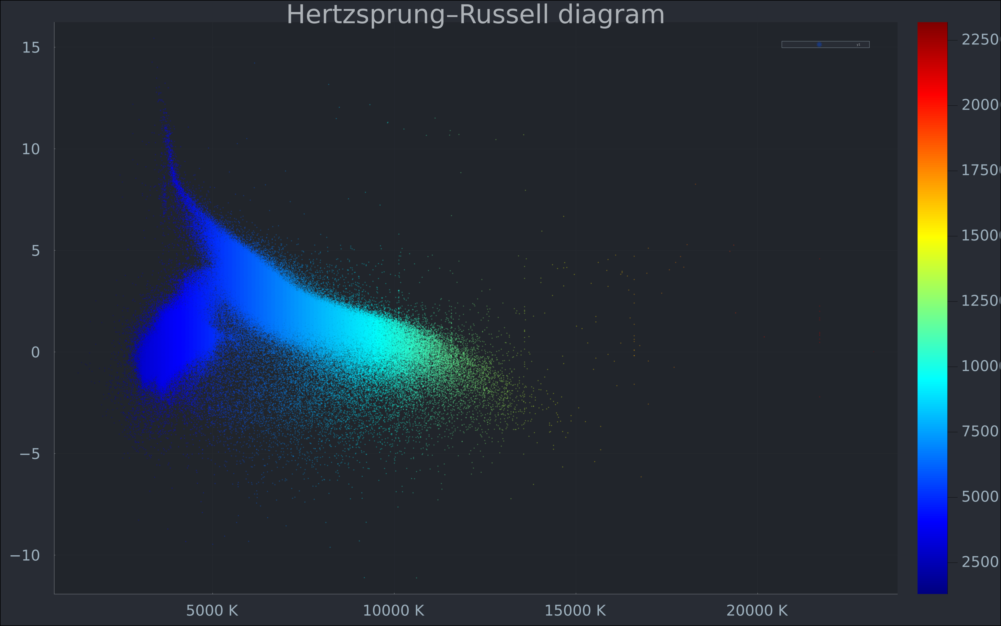

In [35]:
theme(:juno) #plot theme
scatter(high_temp.temp, high_temp.absmag, marker_z = high_temp.temp, 
    marker = (0.2, :x, 1),  color = :jet, size=(4000, 2500),  
    title = "Hertzsprung–Russell diagram", xlabel = "temp", ylabel = "absmag",
    titlefontsize=70, labelfontsize=40, tickfontsize=40, xformatter = x -> @sprintf("%d K", x))
savefig("img/diagram.png")
diagram = load("img/diagram.png")